In [1]:
"adsf"

'adsf'

In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/nychealth/coronavirus-data/master/case-hosp-death.csv"
df = pd.read_csv(url)
df = df.fillna(0)
assert all(c in col for col, c in zip(df.columns, ["DATE", "CASE", "HOSPITAL", "DEATH"]))
df.columns = ["date", "cases", "hospitalizations", "deaths"]
df["date"] = pd.to_datetime(df["date"])

In [3]:
df.head()

,date,cases,hospitalizations,deaths
0,2020-02-29,1,6,0
1,2020-03-01,1,1,0
2,2020-03-02,0,10,0
3,2020-03-03,2,7,0
4,2020-03-04,5,8,0


In [4]:
df.to_csv("data/nyc-covid.csv", index=False)

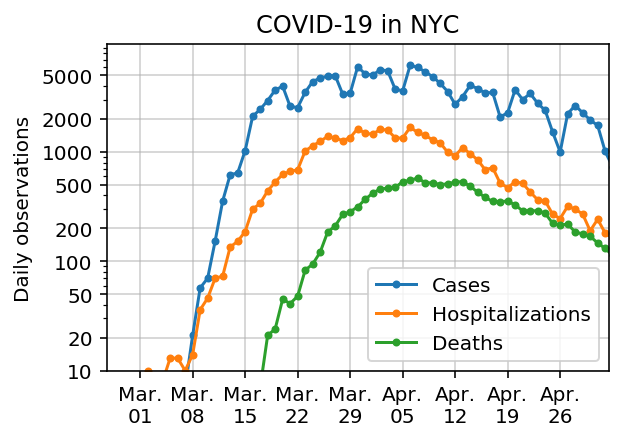

In [5]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

w = 3
fig, ax = plt.subplots(figsize=(1.5 * w, w))
for col in df.columns:
    if col == "date":
        continue
    label = col.replace("_", " ").capitalize()
    ax.plot(df.date, df[col], ".-", label=label)

ax.set_yscale("log")
yticks = sum([[1*f, 2*f, 5*f] for f in [1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]], [])
ax.yaxis.set_major_locator(plt.FixedLocator(yticks))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: str(int(x))))
ax.set_xlim(None, datetime.now() - timedelta(days=7))
ax.set_ylim(10, None)
ax.set_title("COVID-19 in NYC")
ax.set_ylabel("Daily observations")
ax.legend(loc="best")
ax.grid(alpha=0.6)
weeks = [datetime(2020, 3, 1) + timedelta(days=7*k) for k in range(52)]
weeks = list(map(mdates.date2num, weeks))
ax.xaxis.set_major_locator(plt.FixedLocator(weeks))
ax.xaxis.set_major_locator(plt.FixedLocator(weeks))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b.\n%d"))
fig.savefig("imgs/nyc.svg", bbox_inches="tight")
fig.savefig("imgs/nyc.png", bbox_inches="tight", dpi=300)